# ***Exploratory analyses of the survey data***

### ***Inferential & correlational visualizations***
- relationship between farmers' age & education     
`Are older farmers less educated than their younger counterparts?`

- relationship between farmers' age & willigness to adopt IPM       
`Are older farmers less willing to adopt IPM?`

- relationship between farmers' educational status & willigness to adopt IPM      
`Are better educated farmers more willing to adopt IPM compared to their less educated peers?`

- farm land area by GS div      
`Which GS div has the largest & smallest grape vineyards?`

- influence of age, education in personal protectional precautions      
`Are younger farmers more attentive to personal protectional practices compared to older ones?`      
`Are better educated farmers considering PPE more seriously than their less eductaed counterparts?`

- influence of years of experience in adopting IPM     
`How experience influences the farmers willingness to try new techniques? Are there any prejudices & unfound biases in play here?`     

- influence of farmland area in adopting IPM      
`Are farmers with larger fileds less welcoming to IPM since the risk factor is relatively high for them or is the trend opposite since small holders `
- influence of intercropping on fertilizer application
- influence of intercropping on manure application
- influence of crop rotation on fertilizer application
- influence of crop rotation on manure application
- relationship between land area & yield per season
- 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import gc
from collections import Counter

In [2]:
survey = pd.read_excel(r"C:/Users/Anoban/Documents/Survey_analysis/survey_DB.xlsx", sheet_name = "survey")
# survey = pd.read_excel(r"./survey_whoopsies.xlsx")

In [4]:
survey.head()

,date,village,GS_Division,AI_division,name,age,gender,education,PEI_viticulture,other_crops,...,excess_use,imp_health,imp_env,ppe,postSpray_bath,disposal,h_hazard,prac_ipm,willingness_ipm,whynot_ipm
0,2022-03-01,Urumpirai north,J 264,Kopay,Paramanathan Pakeerathan,38,m,ol,10,onion;banana,...,no,no,yes,good,yes,irresponsible,no,no,yes,a;b;d;e
1,2022-03-01,Urumpirai north,J 264,Kopay,Kundumany Subaharan,46,m,below ol,12,onion;beetroot,...,no,no,no,moderate,yes,proper,no,no,yes,b
2,2022-03-01,Urumpirai north,J 264,Kopay,Poothappillai Navaratnam,63,m,NaN,32,onion;beetroot;pumpkin,...,no,no,no,good,yes,irresponsible,no,no,no,a;b;c;d;e
3,2022-03-01,Urumpirai north,J 264,Kopay,Subramaniyam Panneerselvam,59,m,NaN,23,NaN,...,no,no,no,good,yes,irresponsible,no,no,yes,a;b
4,2022-03-01,Urumpirai north,J 264,Kopay,Sellaththurai Thankarasa,64,m,NaN,30,bitter gourd;snake gourd,...,no,Kidney issues,no,good,yes,irresponsible,short term,no,no,a;b;d


In [5]:
survey.columns, len(survey.columns)

(Index(['date', 'village', 'GS_Division', 'AI_division', 'name', 'age',
        'gender', 'education', 'PEI_viticulture', 'other_crops', 'main_income',
        'land_area', 'rootstock_age', 'prunings_per_year', 'since_adivettu',
        'varieties', 'other_vars', 'propagule_source', 'crop_duration',
        'yield_per_season', 'reason_variety', 'crop_rotation', 'rotated_crops',
        'intercropping', 'intercropped_crops', 'irrigation', 'freq_fertilizer',
        'freq_manure(perY)', 'cost_fertilizer', 'cost_pesticide',
        'weed_control', 'ave_income', 'freq_weed_control', 'symp_diagnosis',
        'routine_checks', 'diseases', 'pest_attacks', 'd_management',
        'insecticides', 'fungicides', 'herbicides', 'chem_source',
        'manage_info', 'formulation_type', 'freq_application', 'preharvest_int',
        'application_time', 'application_tool', 'spray_criteria',
        'pcide_selection', 'trend_use', 'pcide_drift', 'eff_chemicals',
        'excess_use', 'imp_health', 'imp

In [6]:
survey.loc[:, ["age", "prac_ipm", "willingness_ipm", "whynot_ipm"]]

,age,prac_ipm,willingness_ipm,whynot_ipm
0,38,no,yes,a;b;d;e
1,46,no,yes,b
2,63,no,no,a;b;c;d;e
3,59,no,yes,a;b
4,64,no,no,a;b;d
...,...,...,...,...
76,49,no,no,b;c;d
77,52,no,no,b;d;e
78,41,no,NaN,a;b;e
79,39,no,no,b;d;e


In [7]:
ipm = survey.loc[:, ["age", "prac_ipm", "willingness_ipm"]]
ipm.prac_ipm = ipm.prac_ipm.apply(lambda x: True if (x == "yes") else False)
ipm.willingness_ipm = ipm.willingness_ipm.apply(lambda x: True if (x == "yes") else False)
ipm = ipm.dropna(axis = 0)
ipm

,age,prac_ipm,willingness_ipm
0,38,False,True
1,46,False,True
2,63,False,False
3,59,False,True
4,64,False,False
...,...,...,...
76,49,False,False
77,52,False,False
78,41,False,False
79,39,False,False


In [8]:
ipm.age.min(), ipm.age.max() 

(27, 72)

In [9]:
ipm_pivot = pd.pivot_table(ipm, aggfunc = "sum", columns = ["age"])
ipm_pivot = ipm_pivot.T
ipm_pivot;

## ***Correlation between age & practicing IPM and willingness to practice IPM***

In [10]:
# categorizing by age
ipm_pivot.index

Int64Index([27, 28, 29, 31, 32, 33, 34, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46,
            47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 63, 64, 67, 70,
            72],
           dtype='int64', name='age')

In [88]:
survey.tail()

,date,village,GS_Division,AI_division,name,age,gender,education,PEI_viticulture,other_crops,...,excess_use,imp_health,imp_env,ppe,postSpray_bath,disposal,h_hazard,prac_ipm,willingness_ipm,whynot_ipm
76,2022-03-21,Palali south,J 254,NaN,Kanagaratnam Ramakrishnan,49,m,ol,18,onion;tomato,...,yes,no,no,poor,yes,burning;burial,no,no,no,b;c;d
77,2022-03-21,Palali northwest,J 255,NaN,Eswaran Sivarajah,52,m,ol,20,NaN,...,no,no,no,poor,yes,irresponsible,NaN,no,no,b;d;e
78,2022-03-21,Atchuvely west,J 287,Puttur,Sinnakili Savarimuththu,41,m,below ol,18,onion;carrot;eggplant,...,NaN,no,NaN,poor,yes,irresponsible,NaN,no,NaN,a;b;e
79,2022-03-21,Atchuvely west,J 287,Puttur,Anton Jeyathas Sebastian,39,m,al,10,tobacco;onion;tomato,...,yes,no,no,moderate,yes,burning,no,no,no,b;d;e
80,2022-03-21,Tholakatti,J 254,Puttur,Rev. Francis,51,m,above al,12,eggplant;tomato;chilli;banana chilli;,...,NaN,NaN,NaN,poor,yes,burial,no,no,no,a;b;c;d


In [12]:
# duplicated data for histograms
age_prac_ipm_hist = np.repeat(ipm_pivot.index, ipm_pivot.prac_ipm)
age_willingness_ipm_hist = np.repeat(ipm_pivot.index, ipm_pivot.willingness_ipm)

In [13]:
age_bins = np.linspace(ipm_pivot.index.min(), ipm_pivot.index.max(), num = 10, endpoint = True)

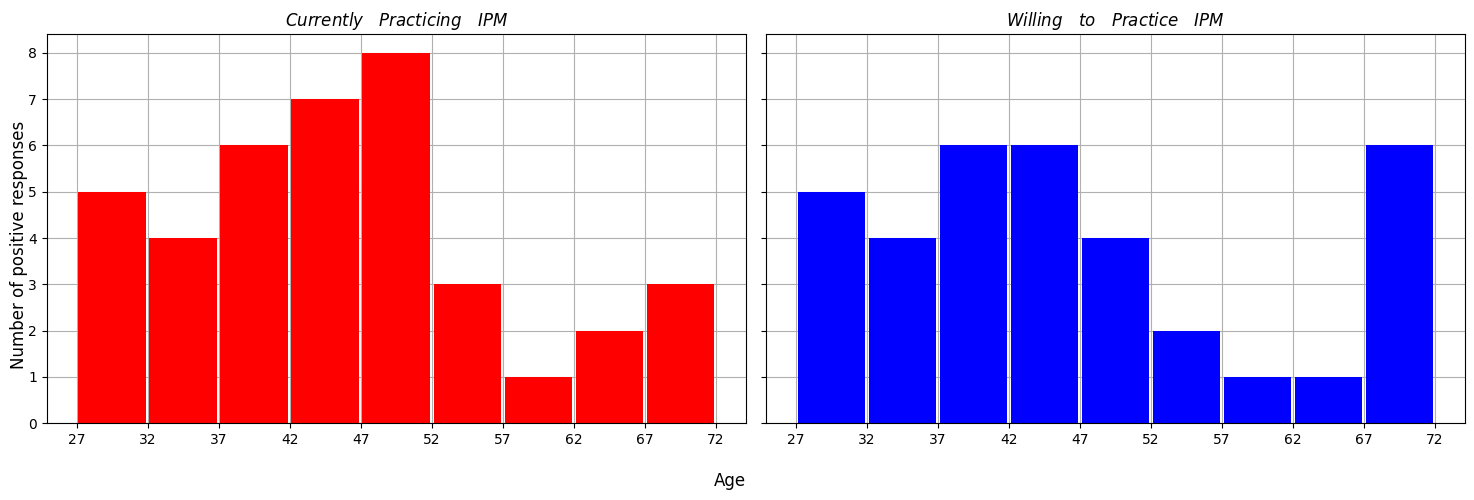

In [14]:
fig, (axes_0, axes_1) = plt.subplots(nrows = 1, ncols = 2, sharey = True)
fig.set_size_inches(15, 5)

axes_0.hist(age_prac_ipm_hist, color = "red", bins = age_bins, rwidth = 0.95) 
axes_0.set_title("$Currently\hspace{1}Practicing\hspace{1}IPM$")
axes_0.set_xticks(age_bins)
axes_0.set_axisbelow(True)
axes_0.grid()

axes_1.hist(age_willingness_ipm_hist, color = "blue", bins = age_bins, rwidth = 0.95)
axes_1.set_title("$Willing\hspace{1}to\hspace{1}Practice\hspace{1}IPM$")
axes_1.set_xticks(age_bins)
axes_1.set_axisbelow(True)
axes_1.grid()

fig.supxlabel("Age")
fig.supylabel("Number of positive responses")
plt.tight_layout()
plt.show()

## ***Correlation between education & practicing IPM and willingness to practice IPM***

In [15]:
Counter(survey.education.dropna())

Counter({'ol': 22, 'below ol': 28, 'above al': 5, 'al': 17})

In [16]:
survey.education.unique()

array(['ol', 'below ol', nan, 'above al', 'al'], dtype=object)

In [17]:
edu = dict()
for key in ['below ol', 'ol', 'al', 'above al']:
    edu[key.upper()] = Counter(survey.education.dropna()).get(key)

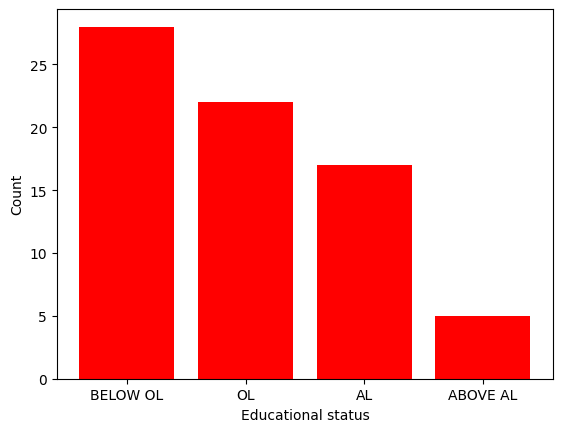

In [18]:
plt.bar(edu.keys(), edu.values(), color = "red")
plt.ylabel("Count")
plt.xlabel("Educational status")
plt.show()

## ***Influence of age & education in good practices***

In [19]:
ppe = survey.loc[:, ["age", "education", "ppe"]].dropna(axis = 0)
ppe.reset_index(inplace = True, drop = True)

In [20]:
ppe.education.unique()

array(['ol', 'below ol', 'above al', 'al'], dtype=object)

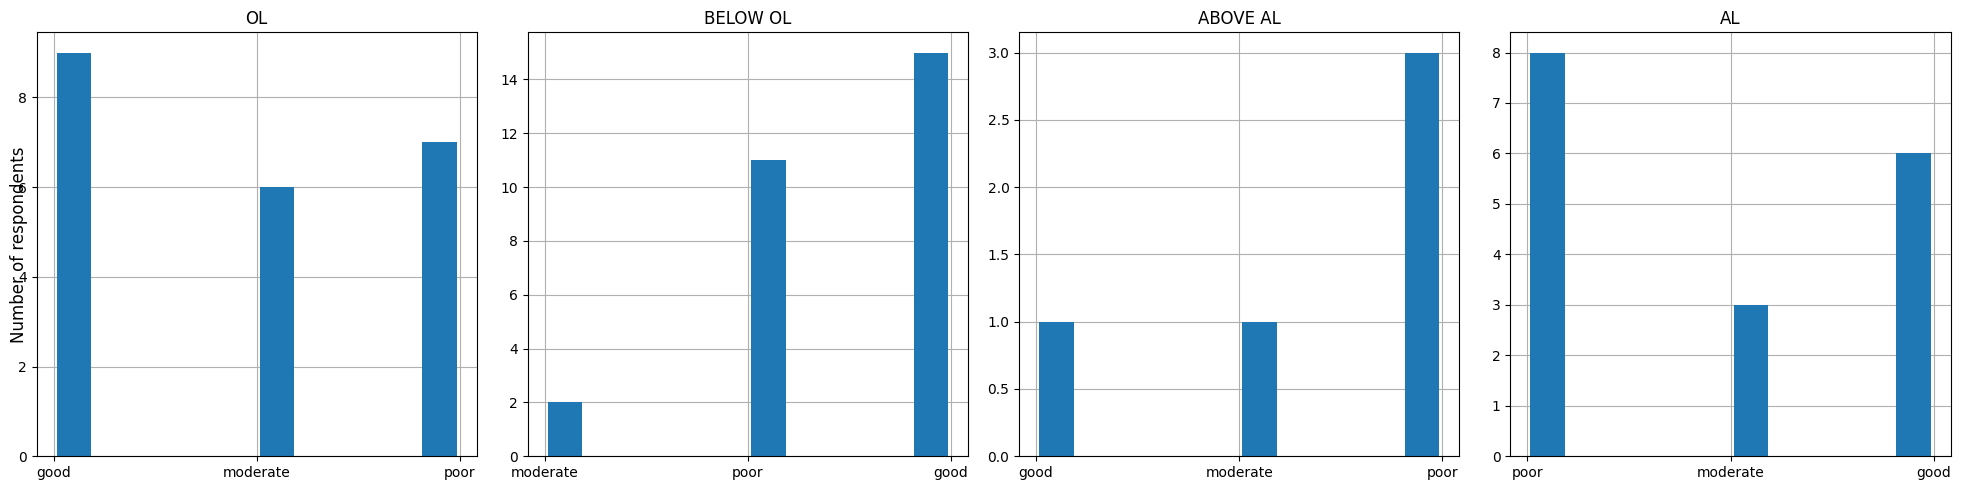

In [21]:
fig, axes = plt.subplots(nrows = 1, ncols = 4) #, sharey = True)         # axes = (axes_0, axes_1, axes_2)
fig.set_size_inches(20, 5)

for (axes_offset, edu_level) in enumerate(ppe.education.unique()):
    data = ppe.query("education == @edu_level")
    axes[axes_offset].hist(data.ppe, rwidth = 0.85)
    axes[axes_offset].set_title(edu_level.upper())
    axes[axes_offset].grid()
    axes[axes_offset].set_axisbelow(True)

fig.supylabel("Number of respondents")
plt.tight_layout()
plt.show()

<span style="color:red; font-weight:bold; font-size:20px">Note that the responses appear rather contradictory to what one might expect based on their educational status.</span>
***(Y axes aren't normalized)***

In [111]:
Counter(ppe.ppe)

Counter({'good': 31, 'moderate': 12, 'poor': 29})

In [89]:
survey.ppe, survey.postSpray_bath, survey.disposal

(0      moderate
 1      moderate
 2          high
 3      moderate
 4      moderate
          ...   
 185        poor
 186    moderate
 187    moderate
 188    moderate
 189         NaN
 Name: ppe, Length: 190, dtype: object,
 0      yes
 1      yes
 2      yes
 3      yes
 4      yes
       ... 
 185    yes
 186    yes
 187    yes
 188    yes
 189    NaN
 Name: postSpray_bath, Length: 190, dtype: object,
 0              irresponsible
 1              irresponsible
 2                     burial
 3                    burning
 4      burning;irresponsible
                ...          
 185            irresponsible
 186            irresponsible
 187            irresponsible
 188            irresponsible
 189                      NaN
 Name: disposal, Length: 190, dtype: object)

### ***Local distribution of Grape vineyards***

In [145]:
survey.GS_Division

0     J 264
1     J 264
2     J 264
3     J 264
4     J 264
      ...  
76    J 254
77    J 255
78    J 287
79    J 287
80    J 254
Name: GS_Division, Length: 81, dtype: object

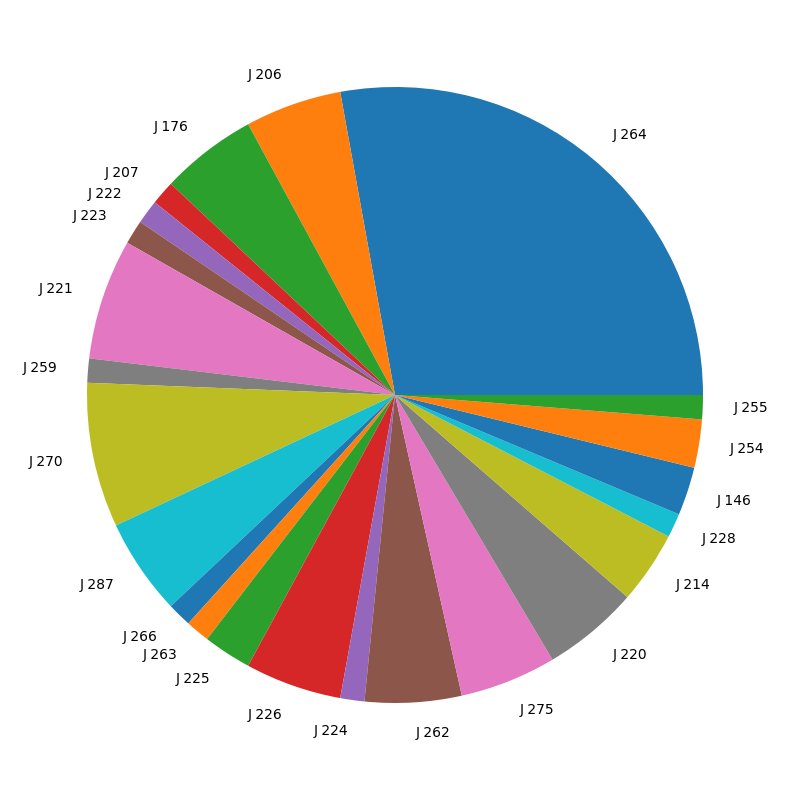

In [158]:
GS = Counter(survey.GS_Division.dropna())

fig = plt.figure(figsize = (10, 10), dpi = 100)
axes = fig.add_subplot(111)
axes.pie(GS.values(), labels = GS.keys())
plt.show()

In [33]:
survey.education

0           ol
1     below ol
2          NaN
3          NaN
4          NaN
        ...   
76          ol
77          ol
78    below ol
79          al
80    above al
Name: education, Length: 81, dtype: object

In [51]:
survey.age.min(), survey.age.max()

(27, 72)

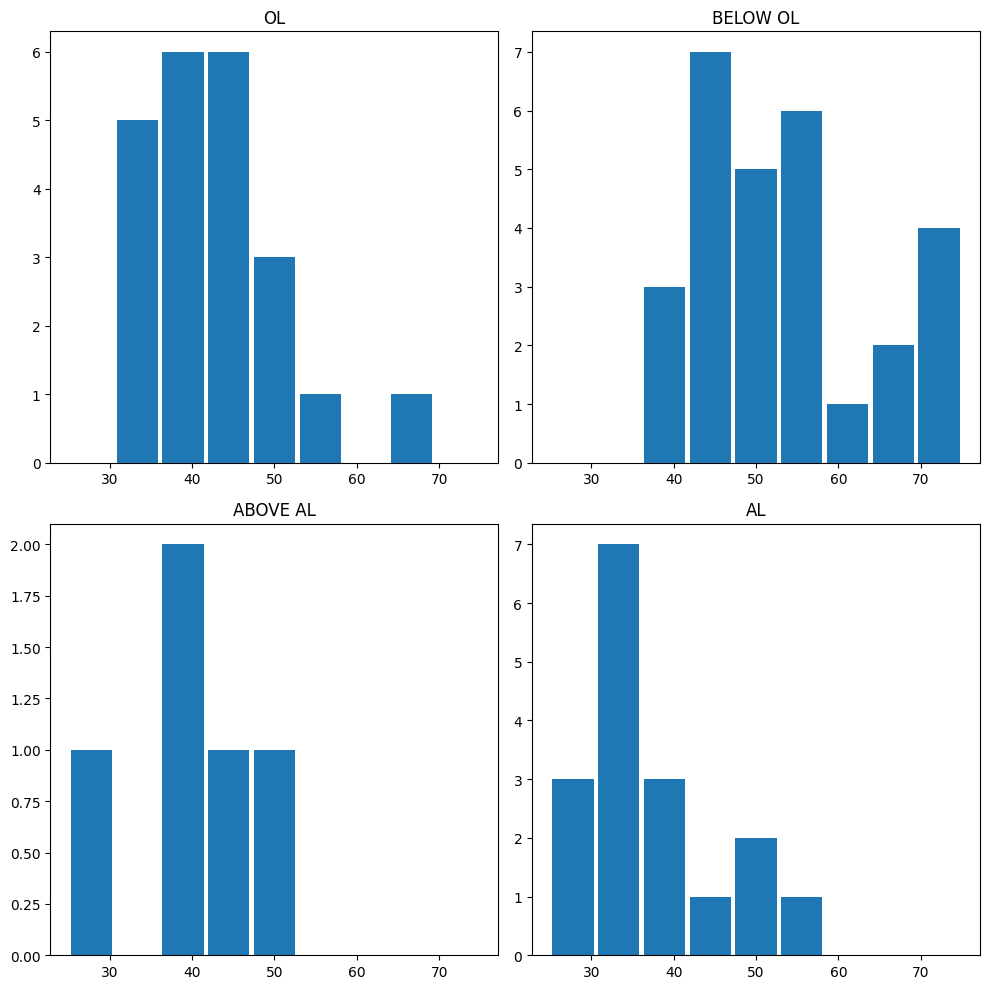

In [85]:
fig, ((axes_0, axes_1), (axes_2, axes_3)) = plt.subplots(nrows = 2, ncols = 2)
fig.set_size_inches(10, 10)

axes = (axes_0, axes_1, axes_2, axes_3)

for edu_level, axis in zip(survey.education.dropna().unique(), axes):
    axis.hist(survey.query("education == @edu_level").age.dropna(), bins = np.linspace(25, 75, 10), rwidth = 0.9)
    axis.set_title(edu_level.upper())

plt.tight_layout()
plt.show()

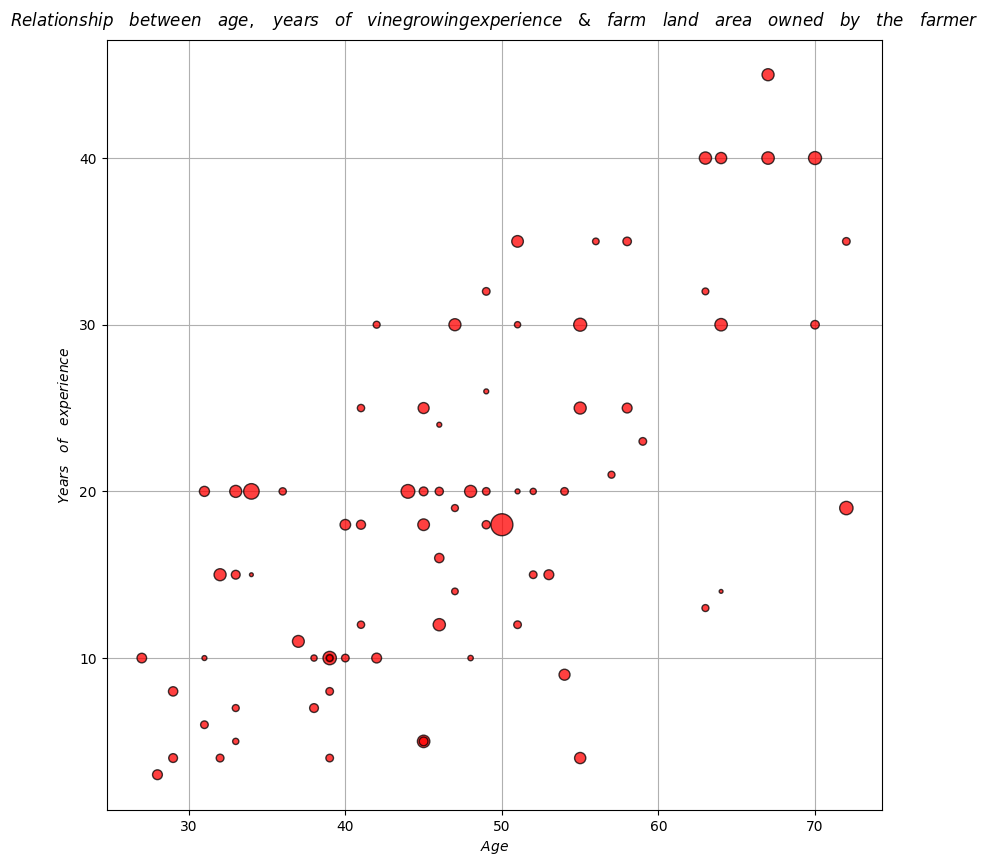

In [87]:
fig, axes = plt.subplots()
fig.set_size_inches(10, 10)
axes.scatter(survey.age, survey.PEI_viticulture, s = survey.land_area * 2.5,
             edgecolors = 'black', color = "red", alpha = 0.75) 
axes.set_xlabel("$Age$")
axes.set_ylabel("$Years\hspace{1}of\hspace{1}experience$")
axes.set_title("$Relationship\hspace{1}between\hspace{1}age,\hspace{1}years\hspace{1}of\hspace{1}vinegrowing\
experience\hspace{1}&\hspace{1}farm\hspace{1}land\hspace{1}area\hspace{1}owned\hspace{1}by\hspace{1}the\hspace{1}farmer$", pad = 10)
axes.grid()
axes.set_axisbelow(True)
plt.show()

### ***Fungicide application based on AI division***

C:\Users\Anoban\AppData\Local\Temp\ipykernel_3944\2437030555.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(axes.get_xticklabels(), rotation = 90)
C:\Users\Anoban\AppData\Local\Temp\ipykernel_3944\2437030555.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(axes.get_xticklabels(), rotation = 90)
C:\Users\Anoban\AppData\Local\Temp\ipykernel_3944\2437030555.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(axes.get_xticklabels(), rotation = 90)
C:\Users\Anoban\AppData\Local\Temp\ipykernel_3944\2437030555.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(axes.get_xticklabels(), rotation = 90)
C:\Users\Anoban\AppData\Local\Temp\ipykernel_3944\2437030555.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(axes.get_xtick

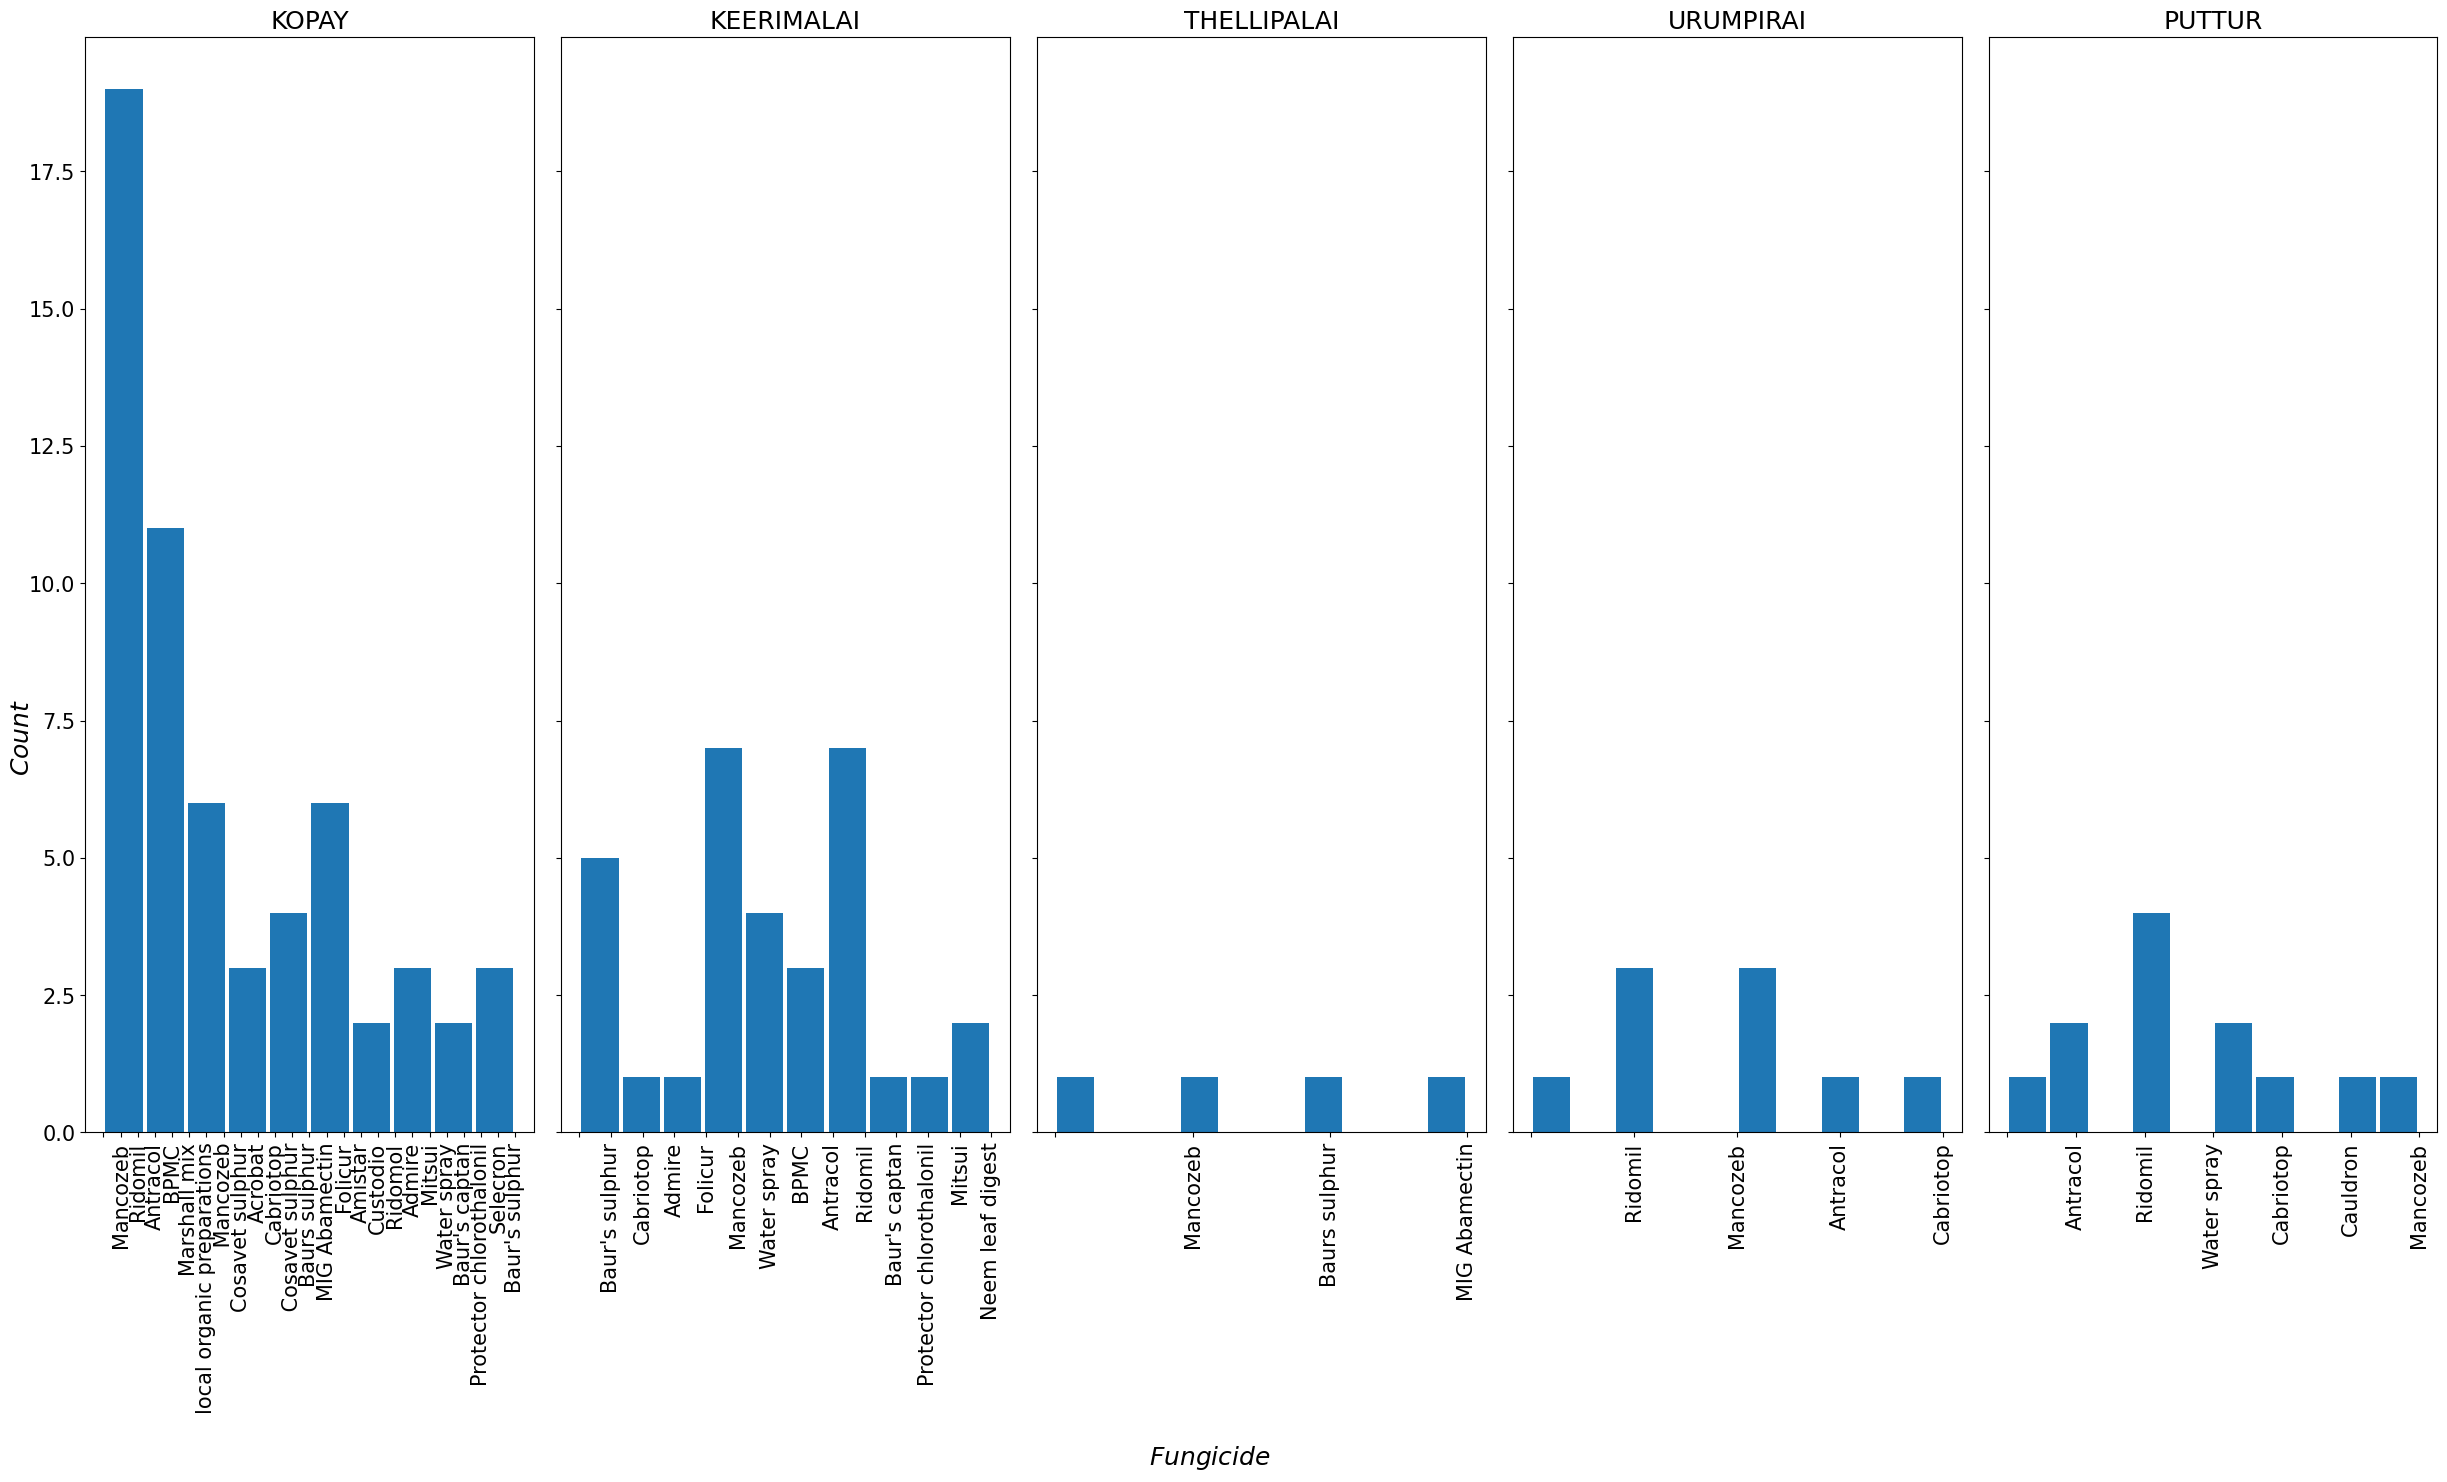

In [115]:
# 5 AI divisions
plt.rcParams["font.size"] = 15

fig, _axes = plt.subplots(nrows = 1, ncols = 5, sharey = True)
fig.set_size_inches(25, 15)
for axes, ai_div in zip(_axes, survey.AI_division.dropna().unique()):
    fcides = ""
    [fcides := fcides + ";" + fcide for fcide in survey.query("AI_division == @ai_div").fungicides.dropna()]
    fcides = fcides.split(";")
    axes.hist(fcides, rwidth = 0.9)
    axes.set_title(ai_div.upper())
    axes.set_xticks(ticks = , labels = axes.get_xticklabels(), rotation = 90)
    

fig.supxlabel("$Fungicide$")    
fig.supylabel("$Count$")
plt.tight_layout()
plt.show()